### **Burgers Equation**

**1D Burger's Equation** 

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}
$$

**2D Burger's Equation**

- Horizontal Velocity (u):
$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

- Vertical Velocity (v):
$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right)
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

**Problem Definition**

In [4]:
# Number of time, x and y steps
nt = 500
nx = 51
ny = 51

# Constant and differential time
nu = 0.1
dt = 0.001

# Spatial differentials
dx = 2/(nx-1)
dy = 2/(ny-1) 

**Data**

In [7]:
# Data points
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
x, y

(array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ]))

In [12]:
# Meshgrid
comb = np.zeros((nx, ny))
comb.shape, comb

((51, 51),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

**Initial conditions**

In [18]:
# Current u
u = np.zeros((nx, ny))
v = np.zeros((nx, ny))

# Previous u
un = np.zeros((nx, ny))
vn = np.zeros((nx, ny))

# Next u
uf = np.zeros((nt, nx, ny))
vf = np.zeros((nt, nx, ny))
uf.shape, vf.shape

((500, 51, 51), (500, 51, 51))

In [22]:
# Initialize solution variables
u = np.ones((nx, ny))
v = np.ones((nx, ny))
uf = np.ones((nt, nx, ny))
vf = np.ones((nt, nx, ny))

u[int(0.75/dy):int(1.25/dy+1), int(0.75/dy):int(1.25/dy+1)] = 5
v[int(0.75/dy):int(1.25/dy+1), int(0.75/dy):int(1.25/dy+1)] = 5

uf[0, int(0.75/dy):int(1.25/dy+1), int(0.75/dy):int(1.25/dy+1)] = 5
vf[0, int(0.75/dy):int(1.25/dy+1), int(0.75/dy):int(1.25/dy+1)] = 5

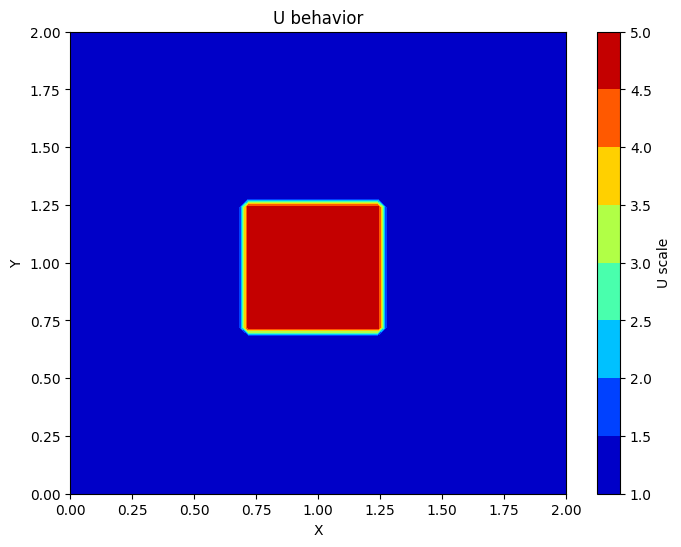

In [27]:
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, u[:], cmap='jet')
plt.title("V behavior")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("V scale")

**Discretize Burgers Equation**

In [28]:
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            u[i,j] = (un[i, j] -(un[i, j] * dt / dx * (un[i, j] - un[i-1, j])) -vn[i, j] * dt / dy * (un[i, j] - un[i, j-1])) + (nu*dt/(dx**2))*(un[i+1,j]-2*un[i,j]+un[i-1,j])+(nu*dt/(dx**2))*(un[i,j-1]-2*un[i,j]+un[i,j+1])
            v[i,j] = (vn[i, j] -(un[i, j] * dt / dx * (vn[i, j] - vn[i-1, j]))-vn[i, j] * dt / dy * (vn[i, j] - vn[i, j-1])) + (nu*dt/(dx**2))*(vn[i+1,j]-2*vn[i,j]+vn[i-1,j])+(nu*dt/(dx**2))*(vn[i,j-1]-2*vn[i,j]+vn[i,j+1])
            uf[n,i,j] = u[i,j]
            vf[n,i,j] = v[i,j]
    u[:,0 ] = 1
    u[:,-1] = 1
    u[0,: ] = 1
    u[-1,:] = 1
    v[:,0 ] = 1
    v[:,-1] = 1
    v[0,: ] = 1
    v[-1,:] = 1     

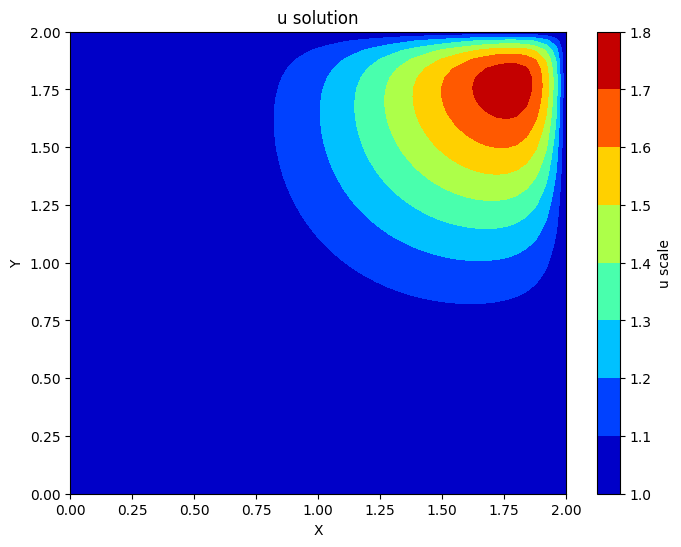

In [29]:
X, Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,u[:], cmap='jet')
plt.title("u solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("u scale")

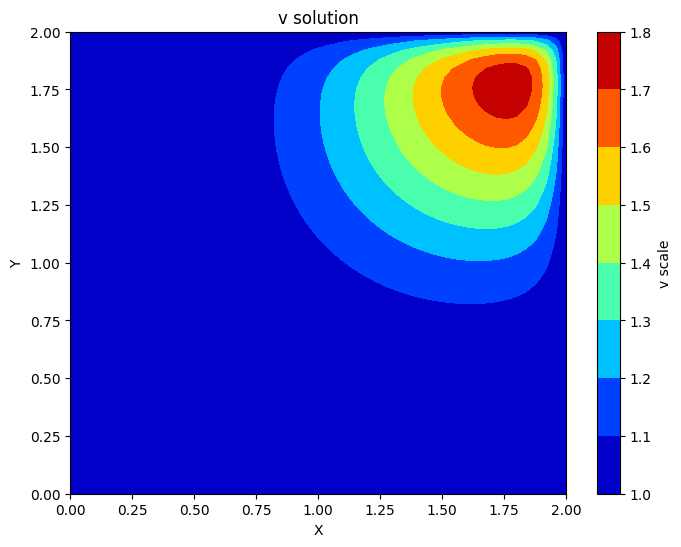

In [30]:
X, Y = np.meshgrid(x,y)

plt.figure(figsize=(8,6))
contour = plt.contourf(X,Y,v[:], cmap='jet')
plt.title("v solution")
plt.xlabel("X")
plt.ylabel("Y")
colorbar = plt.colorbar(contour)
colorbar.set_label("v scale")